-----------------------------------------------------------------------------
-----------------------# Statistique / Nan/ ...------------------------------
-----------------------------------------------------------------------------
# --------- (Var catégorielles vs Var quantitatives) -------------#
-----------------------------------------------------------------------------
# --------- (Supprimer les lignes contenant Nan) -------------#
-----------------------------------------------------------------------------
# --------- (traitement Var catégorielles ----> quantitatives) -------------#


C:\Users\JanaEline\AppData\Local\Temp\ipykernel_7144\1535065790.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Date",1)


-----------------------------------------------------------------------------
# ---- (Verification no NANs et tous les valeurs sont Numériques) ----------#
Index([], dtype='object')
-----------------------------------------------------------------------------
# ---- (Copier DataFrame & modelisation ) ----------#
-----------------------------------------------------------------------------
# ---- ( modelisation : Deep Learning ) ----------#
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 24)]              0         
                                                                 
 Dense_1 (Dense)             (None, 50)                1250      
                                                                 
 Dense_2 (Dense)             (None, 25)                1275      
                                                                 
 Dense_3 (D

C:\Users\JanaEline\AppData\Local\Temp\ipykernel_7144\1535065790.py:115: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_X=df_modelisation.drop('RainTomorrow',1)


Epoch 1/16
139/139 [==============================] - 1s 3ms/step - loss: 0.5375 - acc: 0.7370 - val_loss: 0.4383 - val_acc: 0.8091
Epoch 2/16
139/139 [==============================] - 0s 2ms/step - loss: 0.4043 - acc: 0.8407 - val_loss: 0.3875 - val_acc: 0.8471
Epoch 3/16
139/139 [==============================] - 0s 2ms/step - loss: 0.3737 - acc: 0.8482 - val_loss: 0.3688 - val_acc: 0.8506
Epoch 4/16
139/139 [==============================] - 0s 2ms/step - loss: 0.3582 - acc: 0.8509 - val_loss: 0.3582 - val_acc: 0.8524
Epoch 5/16
139/139 [==============================] - 0s 2ms/step - loss: 0.3478 - acc: 0.8540 - val_loss: 0.3487 - val_acc: 0.8549
Epoch 6/16
139/139 [==============================] - 0s 2ms/step - loss: 0.3400 - acc: 0.8556 - val_loss: 0.3446 - val_acc: 0.8539
Epoch 7/16
139/139 [==============================] - 0s 2ms/step - loss: 0.3343 - acc: 0.8585 - val_loss: 0.3411 - val_acc: 0.8532
Epoch 8/16
139/139 [==============================] - 0s 2ms/step - loss: 0.

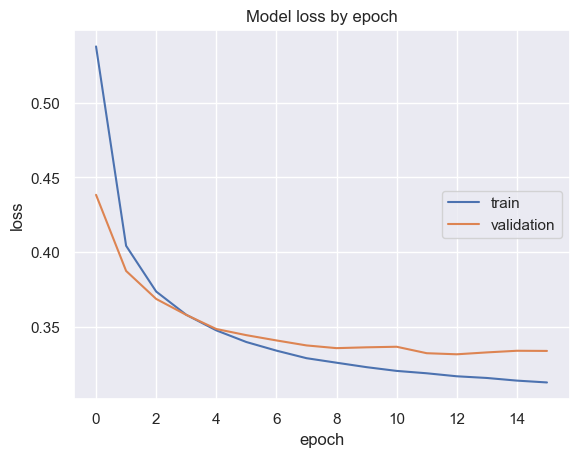

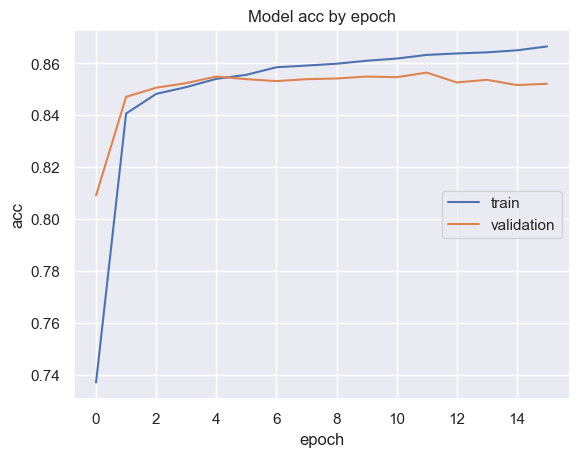

In [2]:
#################################################################
#####      Auteurs : A. Benki, R.Reynier et C. Corbin       #####
#################################################################


"""
Ce script nous permet d'appliquer un algorithme de Deep learning (RN dense) 

une comparaison sera faite avec les résultats obtenus via les algorithmes 
Machine learning ( KNN, SVM et RF)  obtenus avec le script:

(script_modelisation_ML_base_Reduite_NANs_Deleted) de Deep learning (RN dense)

Cas D'étude 2 : Base de données réduite 
Traitement NAN : Suppression
"""

print ("-----------------------------------------------------------------------------")
print ("-----------------------Import des packages  ...------------------------------")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_theme()

from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score



print ("-----------------------------------------------------------------------------")
print ("-----------------------# Statistique / Nan/ ...------------------------------")
# lire la data
df=pd.read_csv("../data/weatherAUS.csv")

print ("-----------------------------------------------------------------------------")
print ("# --------- (Var catégorielles vs Var quantitatives) -------------#")
# je recupére les noms des variables numériques du dataframe
result_numer = df.select_dtypes(include='number')


# je recupére les noms des variables catégorielle du dataframe (exclude numerique)
result_categ = df.select_dtypes(exclude='number')


print ("-----------------------------------------------------------------------------")
print ("# --------- (Supprimer les lignes contenant Nan) -------------#")

df = df.dropna()   # 154 k ---> 56 k

print ("-----------------------------------------------------------------------------")
print ("# --------- (traitement Var catégorielles ----> quantitatives) -------------#")

# Traitement colonne date , transformation en 3 colonne jr , mois et année
##########################################################################

df['Date'] = pd.DataFrame(pd.to_datetime(df['Date']))
df.insert(0, "Year", df['Date'].dt.year, allow_duplicates=False)
df.insert(0, "Month", df['Date'].dt.month, allow_duplicates=False)
df.insert(0, "Day", df['Date'].dt.day, allow_duplicates=False)

df = df.drop("Date",1)

# Traitement colonne location ,  affecter à chaque location une valeur numérique
###############################################################################""


hh = df['Location'].value_counts()
hh_df= pd.DataFrame(hh)

for k in range(hh_df.shape[0]) :
    df['Location']=df['Location'].replace(hh_df.index[k],k+1)
    
    
# Traitement colonnes directions Vents location ,  affecter à chaque direction une valeur numérique
###############################################################################################""

#vent = df['WindGustDir'].value_counts()

V_D=['E','N','S','W', 'NE' , 'NW' , 'SE'  , 'SW'  ,'ENE', 'ESE', 'NNE', 'NNW','SSE','SSW','WNW','WSW']
V_D_Num=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

df['WindGustDir'] = df['WindGustDir'].replace(V_D,V_D_Num)
df['WindDir9am'] = df['WindDir9am'].replace(V_D,V_D_Num)
df['WindDir3pm'] = df['WindDir3pm'].replace(V_D,V_D_Num)


# Traitement colonnes Rain_Today , Rain_Tomorrow ,  affecter une valeur numérique (0 si nn, 1 si oui)
####################################################################################################

#pluie = df['RainToday'].value_counts()

Rain_N_Y=['No','Yes']
Rain_N_Y_Num=[0,1]

df['RainToday'] = df['RainToday'].replace(Rain_N_Y,Rain_N_Y_Num)
df['RainTomorrow'] = df['RainTomorrow'].replace(Rain_N_Y,Rain_N_Y_Num)

print ("-----------------------------------------------------------------------------")
print ("# ---- (Verification no NANs et tous les valeurs sont Numériques) ----------#")

# Verification no NANs et tous les valeurs sont Numériques
#########################################################""
res_num_inter = df.select_dtypes(exclude='number')
print(res_num_inter.columns)
df.head()
df.isna().sum()


print ("-----------------------------------------------------------------------------")
print ("# ---- (Copier DataFrame & modelisation ) ----------#")

df_modelisation = df
df_modelisation.head()

df_X=df_modelisation.drop('RainTomorrow',1)
Target=df_modelisation['RainTomorrow']


# split 

X_train, X_test, y_train, y_test = train_test_split(df_X, Target, test_size=0.3, random_state=42)

#Centrer et réduire les variables explicatives des deux échantillons de manière adéquate.

# On applique  la fonction preprocessing.scale
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)


# rUs = RandomUnderSampler()
# X_train_scaled, y_train = rUs.fit_resample(X_train_scaled, y_train)

# rOs = RandomOverSampler()
# X_train_scaled, y_train = rOs.fit_resample(X_train_scaled, y_train)


print ("-----------------------------------------------------------------------------")
print ("# ---- ( modelisation : Deep Learning ) ----------#")

# Dans la suite nous allons tester plusieurs modéles deep learning afin de choisir le best
##########################################################################################


# Création des couches de type Dense
####################################
inputs = Input(shape = (df_X.shape[1]), name = "Input")

dense1 = Dense(units = 50, activation = "ReLU", name = "Dense_1")
dense2 = Dense(units = 25, activation = "ReLU", name = "Dense_2")
dense3 = Dense(units = 10, activation = "sigmoid", name = "Dense_3")
dense4 = Dense(units = 5, activation = "sigmoid", name = "Dense_4")
dense5 = Dense(units = 2, activation = "sigmoid", name = "Dense_5")

x=dense1(inputs)
x=dense2(x)
x=dense3(x)
x=dense4(x)
outputs=dense5(x)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

# Définir la Loss function
##########################
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["acc"])

# Entrainement de modèle
########################
history = model.fit(X_train_scaled, y_train,epochs=16,batch_size=256,validation_split=0.1)  

# Test de modèle
################
test_pred = model.predict(X_test_scaled)
y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1)


# On évalue le niveau de précision de notre prédiction
######################################################
print("Précision de la prédiction:", accuracy_score(y_test, y_pred_class)*100, '%')
print(classification_report(y_test_class,y_pred_class))
pd.crosstab(y_test_class, y_pred_class, rownames=['Classe réelle'], colnames=['Classe prédite'])


# Les plots de precision
########################
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='right')
plt.show()



In [3]:



pd.crosstab(y_test_class, y_pred_class, rownames=['Classe réelle'], colnames=['Classe prédite'])


Classe prédite,0,1
Classe réelle,,
0,12195,961
1,1489,2281
